In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes.

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features. 

Let's grab it and use it!

In [2]:
df = pd.read_csv("Downloads/K-NEarest-Neighbor-master/Classified Data", index_col = 0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
from sklearn.preprocessing import StandardScaler

/Users/anujkumar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
scaler = StandardScaler()

In [9]:
df.head()


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [11]:
scaler.fit(df.drop('TARGET CLASS',axis = 1))

StandardScaler()

In [12]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [14]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [15]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.30)

### Using KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
model = KNeighborsClassifier(n_neighbors = 1)

In [22]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
pred = model.predict(X_test)

In [38]:
pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [27]:
df['TARGET CLASS'].head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

In [28]:
# pred and target class are not so much similar so we have to inclease the neighbors
# so that we can classify the clsses with optimal output

### Prediction and Evaluation

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(confusion_matrix(y_test, pred))

[[139  13]
 [ 11 137]]


In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       152
           1       0.91      0.93      0.92       148

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



### Choosing a K value

In [48]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

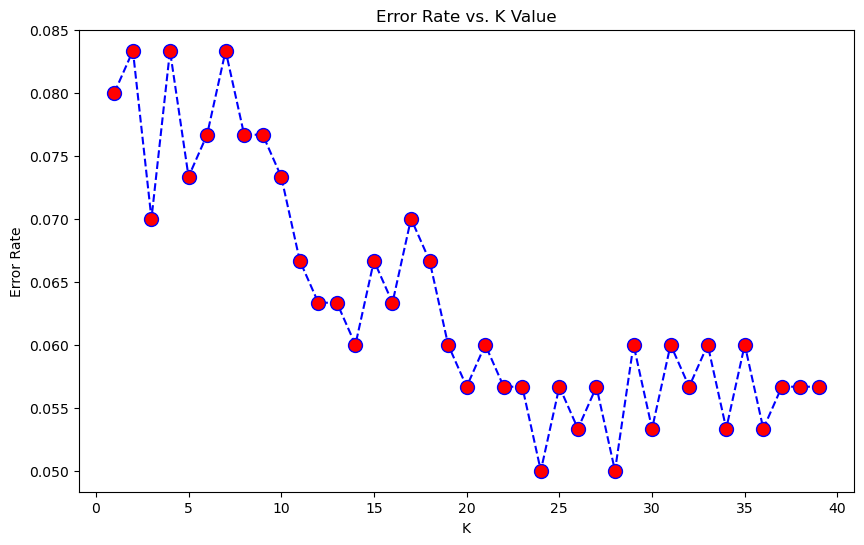

In [54]:
# plt.figure(figsize = (10, 6))
# plt.plot(range(1, 40), error_rate, color = 'y', linestyle = 'dashed', marker='o', 
#         markerfacecolor = 'red', markersize = 10)
# plt.title('Error rate vs K value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [59]:
# 1st a quick comaprision

model = KNeighborsClassifier(n_neighbors = 1)

model.fit(X_train, y_train)

pred = model.predict(X_test)

print('With K = 1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

With K = 1


[[139  13]
 [ 11 137]]


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       152
           1       0.91      0.93      0.92       148

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [61]:
# with k = 23
model = KNeighborsClassifier(n_neighbors = 23)

model.fit(X_train, y_train)

pred = model.predict(X_test)

print('\n')
print(confusion_matrix(pred, y_test))
print('\n')
print(classification_report(pred, y_test))



[[138   3]
 [ 14 145]]


              precision    recall  f1-score   support

           0       0.91      0.98      0.94       141
           1       0.98      0.91      0.94       159

    accuracy                           0.94       300
   macro avg       0.94      0.95      0.94       300
weighted avg       0.95      0.94      0.94       300

